PHAS0029 Session C3: Fitting polynomials
    
*Updated: 19/01/2022*

## Intended learning outcomes:
By the end of this session, you should be able to:
<ul>
<li> Use Python to fit a set of data to a polynomial; </li>
<li> To evaluate the goodness of fit using the matrix of covariance and $\chi^2$</li>
<li> Fit the residuals to a Gaussian. </li>
</ul>

## Why fit to a polynomial?

In physics we often meet an experimental relation between variables which is difficult to describe mathematically. This may either be because the theoretical equation which describes the observed behaviour is difficult to solve, or because the situation is complicated by several ill-defined factors and it is difficult to derive any theoretical equation which can describe it properly. However, we can still measure the dependence between the variables experimentally and we would like to have some means of predicting this dependence. In this kind of situation it is convenient to fit an equation to our experimental data. We can then use the fitted equation to interpolate, i.e. to calculate the expected value of a variable between our measured data points, and to extrapolate, i.e. to calculate the expected value beyond the range of our measured data points. This procedure is often called “parameterizing” the relationship.

In principle we could use any form of equation to fit a set of measured data, but if we have no theoretical basis for fitting a particular type of curve it is often simplest and easiest to fit a polynomial. The order of the polynomial and the coefficients of each term in the fitted equation are called the “parameters” of our fit.

In this session we will look at how to fit polynomials with numpy, using experiment E5 as an example - you should have already done this experiment yourself in the electronics part of the module. The experiment involves calibrating a temperature sensor by measuring its output voltage over a range of temperature. A polynomial equation is then fitted to the experimental results and this calibration equation is later input into a programmable chip so that the sensor can operate as a digital thermometer.

For the purpose of the assignment, you will be working on some old data included in this folder. But once you are happy with your code, you can use it to analyse the data you have collected last week in the Electronics lab or in any future experiment!

# **Task 1**: Load the data

The first thing we need to do is import the modules we'll need. 

In [1]:
# backend for plots
%matplotlib inline

# importing numpy and plotting modules
import numpy as np
import matplotlib.pyplot as plt 

# include borders for histograms etc
plt.rcParams["patch.force_edgecolor"] = True

Now we should load our data file, which is called "studentdataE5.txt". This data file contains two columns, the first is the temperature in Celsius, the second the measured voltage (V). 

<div class="alert alert-success">
In the code cell below create a function called `load_data` that:
        <ul>
            <li>takes a filename as an argument,</li>
            <li>loads the data file using <tt>np.loadtxt</tt>,</li>
            <li>unpacks  the data into two arrays</li>
            <li>plots the data on a (labelled!) graph, using data points only (no line). </li>
            <li> returns the two arrays</li>
</ul>
    
_HINT: make sure you specify how the data should be unpacked. How would it be different if your .txt file contained two rows instead of columns?_

</div>

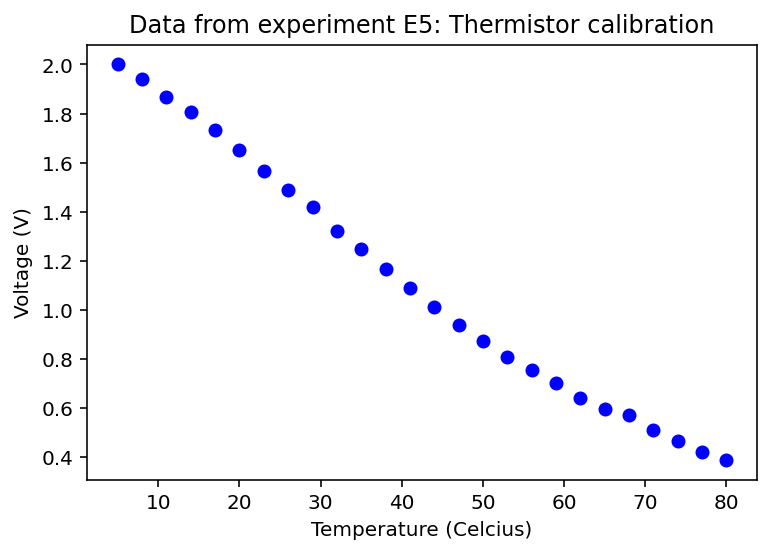

In [2]:
def load_data(file):
    
    '''
    This function takes in a 'file', loads and unpacks its data content into two arrays, and plots the data content on a labelled graph. 
    Then it returns the unpacked data contents as two data arrays.
    
    Input: filename (a datafile of type string)
    Output: two arrays of data (temp and voltage)
    '''
    
    #Loading the data file ('file') using np.loadtxt and unpacking its data contents into two arrays
    #'unpack = true' ensures that the two vertical columns of the data file is loaded and stored into two seperate arrays
    temp, voltage = np.loadtxt(file,unpack = "true")
    
    #plotting the data on a graph, 'o' means that the points are plotted to be circles, and the colour of the points blue
    plt.plot(temp, voltage, 'o', color="blue", label='experimental data')
    
    #Title of graph
    plt.title('Data from experiment E5: Thermistor calibration')

    #x-axis label of graph
    plt.xlabel('Temperature (Celcius)')

    #y-axis label of graph
    plt.ylabel('Voltage (V)')
    
    #returning temp (x data) and voltage (y data)
    return temp, voltage


    
# for your convenience, the next line calls your function to read the data file
temp,voltage=load_data('studentdataE5.txt')
    

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint: </b> </font> Run the next cell to check if your function <tt>load_data</tt> works correctly. 
    </div>

**********
Well done! All test passed. You can move to the next part of the task.
**********


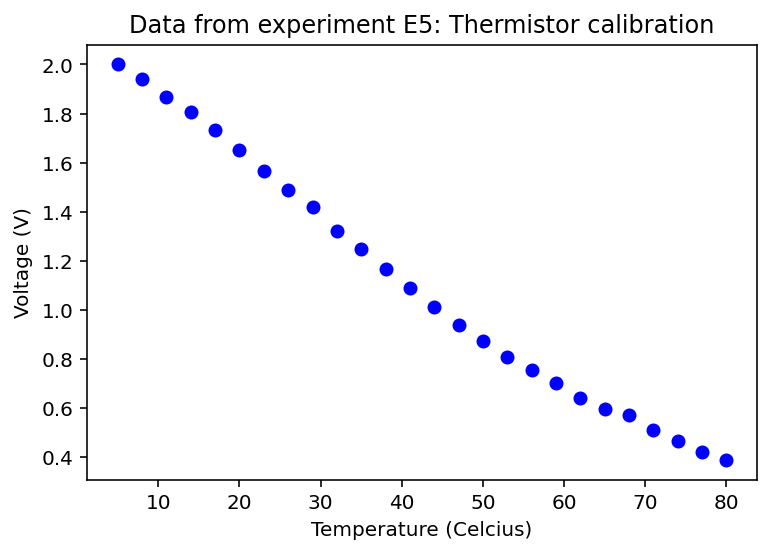

In [3]:
from nose.tools import assert_raises
#check if function exists
assert "load_data" in dir(
), 'Make sure you define your function and use the specified function name'
#check output format of function
outp = load_data('studentdataE5.txt')
assert np.shape(outp)==(2,26), 'Make sure your function returns two outputs'
assert (type(outp[0]) == np.ndarray) & (type(
    outp[1]) == np.ndarray), 'Both your outputs should be numpy arrays'
#check if filename is an argument
assert_raises(OSError,load_data,'studendataE5.txt')

print('**********\nWell done! All test passed. You can move to the next part of the task.\n**********')

## Numpy's polyfit function(s)

Fortunately, we can get numpy to do all the hard work of fitting for us, by using the * **polyfit** * function. The documentation for this is here: http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html - have a quick look at this before proceeding.

The cell below shows an example usage of np.polyfit to fit our data to a polynomial of degree 2. To run it, we will use the `temp` and `voltage` created above.

In [4]:
degree = 2 # degree of polynomial we want to fit to
p = np.polyfit(temp,voltage,degree)
print ("The fitted polynomial coefficients are", p)

The fitted polynomial coefficients are [ 1.06532357e-04 -3.15934839e-02  2.21148238e+00]


***IMPORTANT NOTE:*** Numpy actually has two versions of polyfit. `numpy.polyfit`, and  `numpy.polynomial.polynomial.polyfit`. They are almost identical, and are used in the same way. But look at the one crucial difference:

In [5]:
p = np.polyfit(temp,voltage,degree)
print ("np.polyfit returns the coefficients as", p)
pp = np.polynomial.polynomial.polyfit(temp,voltage,degree)
print ("np.polynomial.polynomial.polyfit returns the coefficients as", pp)

np.polyfit returns the coefficients as [ 1.06532357e-04 -3.15934839e-02  2.21148238e+00]
np.polynomial.polynomial.polyfit returns the coefficients as [ 2.21148238e+00 -3.15934839e-02  1.06532357e-04]


`numpy.polyfit` (our `np.polyfit`) returns the coefficients with the highest power first, but `numpy.polynomial.polynomial.polyfit` returns the lowest power first. This is daft.
  
However, it is an important reminder of *why* we import our modules with named abbreviations - it makes it clear which version of which module function we're using!

## Plotting fitted polynomials

Now we have our polynomial coefficients, we probably want to plot this polynomial to see how good the fit is. We could construct an expresssion for this from the elements of p, but there's a much easier way to do this with the numpy function `poly1d()` (http://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html ), which will convert the array of polynomial coefficients $p$ into a function that we can call to generate the value of the polynomial for a given value of $x$. The following code cell does this by using np.poly1d to create a _function_ called "line":

In [6]:
line = np.poly1d(p)

# output the result of this as a (rather poorly formatted!) algebraic expression of the polynomial
print(line)

# Example: evaluate this polynomial at x = 42
print("When x = 42 this polynomial has the value", line(42))

           2
0.0001065 x - 0.03159 x + 2.211
When x = 42 this polynomial has the value 1.0724791290191298


# **Task 2**: Simple fit

<div class='alert alert-success'> 
Now you need to:
<ul>
<li> Generate an array of x-values for plotting the fit line </li>
<li> Use the "line" function we just created to generate a corresponding array of y-values.</li>
<li> Plot the original data (as points) and the fitted line (as a line) on a labelled graph.</li>
</ul>
Do this in the cell below.<br>
HINT: you don't need to define any functions.
</div>

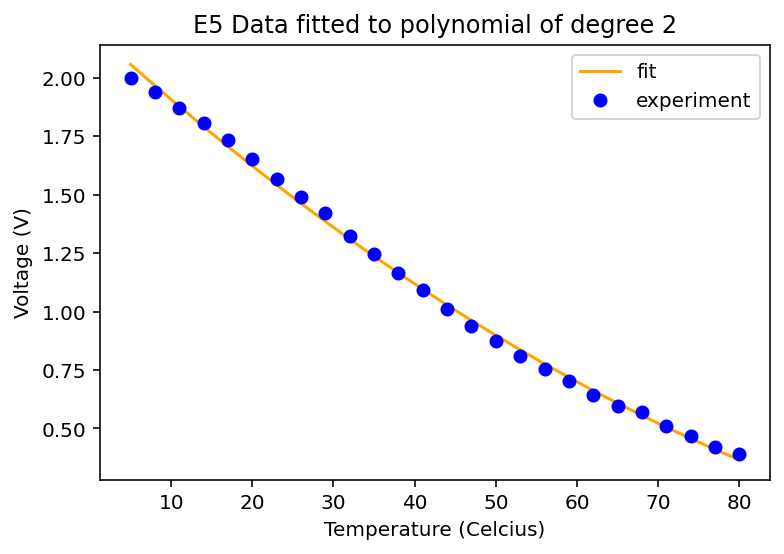

In [7]:
#Array of x-values (temperature)
x = temp

#Generating a corresponding array of y-values
y =line(x)

#plotting the fit line, '-' means that line drawn is going to be solid, the colour of the line is orange
plt.plot(x, y, '-', color="orange", label='fit')

#plotting the experimental data, 'o' means that the points are plotted to be circles, the colour of the data points is blue
plt.plot(temp, voltage,'o', color="blue", label='experiment')

#Title of my graph
plt.title('E5 Data fitted to polynomial of degree 2')

#x-axis label of my graph
plt.xlabel('Temperature (Celcius)')

#y-axis label of my graph
plt.ylabel('Voltage (V)')

#legend of my graph
plt.legend()

At first glance, this second-order polynomial looks okayish (or it should do if you've done it right!) - but with definite room for improvement.

But how good is the fit really?

# Goodness of fit

## Calculating the errors on the coefficients and the matrix of covariance.
We'll recalculate, this time with an important addition to the polyfit call - we'll ask it to also calculate the matrix of covariance.

(A Python aside: In the cell below, there's also a line that limits the number of decimal places that are displayed when we print a numpy array. This is just for convenience - compare this with the arrays printed out at full precision above: which do you find easier to read? You can change the number of decimal points displayed to whatever you want. Note that this will affect _all_ arrays printed after this line is run, but won't affect the formatting of any other numbers, including array elements. See https://docs.scipy.org/doc/numpy/reference/generated/numpy.set_printoptions.html for full documentation of this function - we will be using it again in other sessions.)

In [8]:
# It's useful to limit the number of dp displayed for arrays - see above
np.set_printoptions(precision=4) # 4 dec.places

# recalculating the polynomial
degree = 2 # degree of polynomial we want to fit to
p, v = np.polyfit(temp,voltage,degree,cov=True)
print("The fitted polynomial coefficients are:\n", p)
print("The matrix of covariance is:\n", v)

The fitted polynomial coefficients are:
 [ 1.0653e-04 -3.1593e-02  2.2115e+00]
The matrix of covariance is:
 [[ 1.0888e-10 -9.2548e-09  1.4154e-07]
 [-9.2548e-09  8.3056e-07 -1.3897e-05]
 [ 1.4154e-07 -1.3897e-05  2.8553e-04]]


## What is the matrix of covariance?

**The quick answer:** The matrix of covariance allows us to calculate the errors on our fitted parameters. For $n$ parameters, the matrix of covariance is an $n \times n$ matrix, whose diagonal elements are the *square* of the uncertainties of the fitted parameters. The off-diagonal elements give the level of correlation between the uncertainties in the parameters - we won't use them here.

**The long (and more complete answer)** is given in sections 7.2-7.4 of [Hughes and Hase](https://www.dawsonera.com/guard/protected/dawson.jsp?name=https://shib-idp.ucl.ac.uk/shibboleth&dest=http://www.dawsonera.com/depp/reader/protected/external/AbstractView/S9780191576560).

The cell below will output the order of each coefficient, the corresponding coefficient and its error, with appropriate text strings.

Look at how we do this:

1. This is most easily done using a loop over the elements of `p`. For example, the length of an array `p` is given by `len(p)` or `np.size(p)`. The structure  `for i in range(np.size(p)):` sets up a loop that will iterate the same number of times as there are elements in the array.
2. Remember that `np.polyfit` gives the coefficients largest-order first. So for a loop with increasing index i, the order of the coefficient `p(i)` will be given by `len(p)-i-1`.
3. We use <tt>np.diag</tt> to extract the diagonal elements of the matrix of covariance, in the form of a 1d array. You can find out more about this numpy function here: <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html"> http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html</a>
<br>  
Remember that the errors of each coefficient are given by the <b>square root</b> of these diagonal elements.

In [9]:
# extract coefficients and errors from matrix of covariance
for i in range(np.size(p)):
    print("coefficient order x^", len(p)-i-1, " is ", p[i], " with error ", np.sqrt(np.diag(v))[i]) 

coefficient order x^ 2  is  0.00010653235653235605  with error  1.0434546919011604e-05
coefficient order x^ 1  is  -0.03159348392348388  with error  0.0009113488119132202
coefficient order x^ 0  is  2.2114823768823766  with error  0.01689752370283341


## Interpretation of these errors

When doing calculations like this it's important to understand how the mathematics of the calculations relates to the reality of the experiment and the data. In this case we can see that the off-diagonal elements of `v` are clearly non-zero, and hence there is a significant correlation between the polynomial coefficients.

The diagonal elements of the matrix of covariance can be used to find the uncertainty of a coefficient *IF THAT COEFFICIENT ALONE IS THE REQUIRED RESULT OF THE EXPERIMENT*; but when calculating any values based on the full set of coefficients (e.g. the value of the fit for a particular abscissa value) this can give a gross overestimate.  In advanced methods the full matrix is used, but at the undergraduate level some simplified approximation should be employed, such as taking just the covariance of the zero order coefficient.

You should bear this in mind when you are doing experiment E5 yourselves. For the moment, however, as we are just concerning ourselves with the polynomial fitting itself, we'll continue to take the errors of the coefficients from the matrix of covariance.

This issue will be explored in more detail next year in course PHAS0051 (Lab 3).

# Calculating the residuals and $\chi^2$

Remember that the residuals are defined as the **vertical** distance between each of the data points and the fitted line. If the fitted line passes exactly through one of the data points the residual for this point is zero. We can see intuitively that if we have a "good" fit the residual values will be small. However, we have to remember that our experimental data points are subject to random errors and so we should expect the values of the residuals to be randomly distributed about zero. If we find that all the residuals are exactly zero we should start to suspect that our line is "over-fitted". This means it fits our initial data exactly, but if we take any more measurements (subject of course to the same random errors) the line will not fit them and therefore cannot be used to predict their values in advance. So for a useful parameterization of our dataset we need a fit which is "good" but not "too good". The chi-squared test is a statistical tool which can help us find the sort of fit we need. 

*Hint: For a guide that will enable you to use a numerical value of $\chi^2$ to decide if your fit is "good", "too good", or "not good", look at the text box on page 107 of [Hughes and Hase](https://www.dawsonera.com/guard/protected/dawson.jsp?name=https://shib-idp.ucl.ac.uk/shibboleth&dest=http://www.dawsonera.com/depp/reader/protected/external/AbstractView/S9780191576560).*




The numpy polyfit function calculates the residuals for us. We can also obtain more data from polyfit by setting `full=True` (but note that this is mutually exclusive with `cov=True`, you can only have one or the other). Again from the [np.polyfit documentation](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html#numpy.polyfit):

       "residuals, rank, singular_values, rcond : present only if full = True
            Residuals of the least-squares fit, the effective rank of the scaled Vandermonde coefficient matrix, 
            its singular values, and the specified value of rcond. For more details, see linalg.lstsq."

Let's look at what this gives us:
      

In [10]:
p, residuals, rank, singular_values, rcond = np.polyfit(temp,voltage,degree,full=True)

print("p is:", p)
print("(sum of the square of the) residuals is:", residuals)
print("rank is:", rank)
print("singular_values is:", singular_values)
print("rcond is:", rcond)


p is: [ 1.0653e-04 -3.1593e-02  2.2115e+00]
(sum of the square of the) residuals is: [0.0133]
rank is: 3
singular_values is: [1.6569 0.4974 0.0845]
rcond is: 5.773159728050814e-15


Note that here "residuals" gives us the *sum* of the square of the residuals, not the individual residuals themselves, which is normally what we're interested in. But it's easy to calculate them, so normally it's more useful to have `cov=True` than `full=True`.

To calculate the residuals, we just remember that the residuals are the vertical distance between the data point and the fitted line. 

## **Task 3**: Residuals

<div class="alert alert-success">
Define a function called <tt>get_residuals</tt> that takes your polynomial coefficients <tt>p</tt> as well as x and y data as arguments and returns:
<ul>
<li> the residuals; </li> 
<li>  the squares of the residuals; and</li> 
<li>  the sum of the squares of the residuals.</li> 
</ul>
    
Your result for the sum of the squares of the residuals should the same as the same as the "residuals" generated by `full=True` in the code cell above.
</div>


In [11]:
def get_residuals(p,temp,voltage):
    
    '''
    This function takes in the polynomial coefficients p, as well as x and y data.
    Then it calculates the value of the residuals, the squares of the residuals, and the sum of the squares of the residuals, and returns those calculated       values.
    
    
    input: p (polynomial coefficients), temp (x data), voltage (y data)
    output: residuals, the squares of the residuals, the sum of the squares of the residuals

    '''
    #converting the array of polynomial coefficients 'p' into a fit function called line
    line = np.poly1d(p)
    
    
    #Generating a corresponding array of y-values of the fitted polynomial function
    y = line(temp)
    
    

    #calculating the residuals, the vertical distance between the experimental data points (voltage) and the fitted line
    residuals = voltage - y
    
    #calculating the square of the residuals
    residuals_square = np.square(residuals)
    
    #calculating the sum of the squares of the residuals
    sum_residuals_square = np.sum(residuals_square)
    
    
    #returning the residuals, the square of the residuals and the sum of the squares of the residuals   
    return residuals, residuals_square, sum_residuals_square  
    

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your function <tt>get_residuals</tt> works correctly. 
    </div>

In [12]:
#check if function exists
assert "get_residuals" in dir(), 'Make sure you define your function and use the specified function name.'
#check output format of function
xt=np.arange(0,10)
yt=xt**3+2*xt-3
pt = np.polyfit(xt,yt,3)
linet = np.poly1d(pt)
outst=get_residuals(pt,xt,yt)
assert (type(outst[0])==np.ndarray)&(type(outst[1])==np.ndarray), 'Return all residuals and squared residuals in arrays'
assert (len(outst[0])==len(xt))&(len(outst[1])==len(xt)),'Your residuals arrays should have the same number of elements as your data.'

#check than linspace and polyfit not called
from unittest.mock import patch
with patch('numpy.linspace') as mock_linspace:
    get_residuals(line,temp,voltage)
assert not mock_linspace.called,'Do not use the linspace method - your residuals should be calculated for x values from the dataset'
with patch('numpy.polyfit') as mock_polyfit:
    get_residuals(line,temp,voltage)
assert not mock_polyfit.called,'Calculate residuals from scratch - do not use numpy.polyfit!'

#check if calculation within function is correct
assert outst[2]==np.sum((linet(xt)-yt)**2),'Your third output should be a single number equal to the sum of squared residuals'
if len(outst[0])==len(get_residuals(p,temp,voltage)[0]):
    assert not outst[0]==get_residuals(p,temp,voltage)[0],'Your function should work for any arguments, not only those we called temp and voltage. Hint: make sure you are using local variables names.'
print('**********\nWell done! All test passed. You can move to the next part of the task.\n**********')

**********
Well done! All test passed. You can move to the next part of the task.
**********


To take account of the random experimental errors affecting our data we can also divide the residuals by the error in the dependent variable (here the voltage is our "y" value), which for this experiment was estimated by the student as 0.006 V for all values (if the error is different for each measurement, we can just have a 1D-array for this instead of a single number). 

Dividing this by the number of degrees of freedom will give us the reduced $\chi^2$. The number of degrees of freedom is defined as the total number of datapoints minus the number of coefficients or fitting parameters in the fitted equation.

## **Task 4**: Chi squared

<div class="alert alert-success">
The student collecting our data measured the error in the voltage to be 0.006 V for all the measured values. 
<br>
    In the cell below, define a new function <tt>chi_sq</tt> that:
<ol>
    <li> takes polynomial coefficients (array), x, y data and error in y as arguments</li>
    <li> uses your function from above (<tt>get_residuals</tt>) to calculate residuals </li>
<li>is using the residuals divided by the y-error  rather than the residuals alone. (<i>Hint: Set a variable for the y-error, don't hardcode a value of 0.006 V.</i>)</li>
    <li>returns:
        <ul>
            <li>the new residuals
            <li>no. of degrees of freedom</li>
            <li>$\chi^2$</li>
        </ul></li>
    </ol>
</div>

In [13]:
def chi_sq(p,temp, voltage, y_error):
    
    '''
    This function takes in the polynomial coefficients, x and y data and error in y as arguments.
    Then it calls the function 'get_residuals' to calculate a value for the residuals.
    Then it calculates the residuals divided by the y-error (i.e the new residuals) and the number of degrees of freedom and the chi-squared.
    
    Input: polynomial coefficients (p), temp (x data), voltage (y data), y-error (error in voltage)
    Output: new residuals, number of degrees of freedom, reduced chi-squared
    '''
    
    
    #using function 'get_residuals' to calculate residuals
    residuals = get_residuals(p,temp,voltage)[0]
    
    #dividing the residuals by the error in the dependent variable inorder to get the new residuals
    new_residuals = residuals/y_error
    
    #calculating the number of degrees of freedom (the total number of datapoints - the number of coefficients in the fitted polynomial equation)
    num_degrees_of_freedom = len(voltage)-len(p)
    
    #calculating the squares of the new residuals
    squares_of_new_residuals = np.square(new_residuals)
    
    #calculating the sum of the squares of the new residuals
    sum_of_squares_of_new_residuals = np.sum(squares_of_new_residuals)
    
    #calculating chi-squared
    reduced_chi_squared = sum_of_squares_of_new_residuals/num_degrees_of_freedom
    
    #returning the new residuals (new_residuals), the number of degrees of freedom (num_degrees_of_freedom), the reduced chi-squared (reduced_chi_squared)
    return new_residuals, num_degrees_of_freedom, reduced_chi_squared
    



my_chi_sq=chi_sq(p,temp,voltage,0.006)
print("Number of degrees of freedom is", my_chi_sq[1]," and reduced chi^2 is", my_chi_sq[2])

Number of degrees of freedom is 23  and reduced chi^2 is 16.051055605693286


<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your function <tt>chi_sq</tt> works correctly. 
    </div>

In [14]:
#check if function exists
assert "chi_sq" in dir(), 'Make sure you define your function and use the specified function name.'
xt=np.arange(0,10)
yt=xt**4+2.5*xt-1.3
yerrt=0.1
pt=np.polyfit(xt,yt,4, full=True)
assert not all(chi_sq(pt[0],temp,voltage,0.001)[0]==chi_sq(pt[0],temp,voltage,0.006)[0]), 'Your function should work for any set of arguments, i.e. for any data set, error or polynomial.'
assert not all(chi_sq(pt[0]*2,temp,voltage,0.006)[0]==chi_sq(pt[0],temp,voltage,0.006)[0]), 'Your function should work for any set of arguments, i.e. for any data set, error or polynomial.'

#check output format of function

rest,doft,chit=chi_sq(pt[0],xt,yt,yerrt)
assert (type(rest)==np.ndarray)&(all(rest!=get_residuals(pt[0],xt,yt)[0])), 'Return all residuals scaled by the error in an array.'
assert doft==len(yt) - len(pt[0]),'Calculated number of degrees of freedom is incorrect.'
assert chit==np.sum((get_residuals(pt[0],xt,yt)[0]/yerrt)**2)/doft, 'Calculated chi squared is incorrect'

#check than polyfit not called
from unittest.mock import patch
with patch('numpy.polyfit') as mock_polyfit:
    chi_sq(pt[0],xt,yt,yerrt)
assert not mock_polyfit.called,'Calculate residuals from scratch - don`t use numpy.polyfit as your function should return individual residuals, not just the sum of them.'

print('**********\nWell done! All test passed. You can move to the next part of the task.\n**********')

**********
Well done! All test passed. You can move to the next part of the task.
**********


# **Task 5**: Putting it all together

<div class="alert alert-success">
Now, using your <tt>chi_sq</tt>, define a useful function to perform fit to the data with errors and $\chi^2$. Your function should be called <tt>my_fit</tt> and take in x and y data, error in y and degree of polynomial as arguments. It should return the fitted polynomial coefficients with their error, followed by residuals, number of degrees of freedom and reduced $\chi^2$.
    
Hints: 
<ul>
    <li> this function combines everything we discussed in this notebook so far. Start by using <tt>np.polyfit</tt> to perform a fit.</li>
    <li> use your function <tt>chi_sq</tt> to simplify the code and avoid additional debugging</li>
    <li> don't forget to calculate the coefficient errors - they are not simply the output of <tt>np.polyfit</tt>!</li></ul></i>
  </div>

In [15]:
def my_fit(temp, voltage,y_error,degree):
    '''
    This function takes in the temp (x data), voltage (y data), y_error (error in y data), and the degree of the fitted polynomial.
    Then it calculates the fitted polynomial coefficients along with their errors, residuals, number of degrees of freedom, and the reduced chi-squared.
    
    
    Input: temp (x data), voltage (y data), y_error (error in y data), number of degrees of the fitted polynomial
    
    Output: the fitted polynomial coefficients (p), error in the fitted polynomial coefficients (coefficient_errors), 
    residuals, number of degrees of freedom (degrees_of_freedom), and the reduced chi-squared (reduced_chi_sq)
    '''
    
    #limiting the number of dp displayed for arrays to 4 decimal places
    np.set_printoptions(precision=4) # 4 dec.places

    #'polyfit' allows us to fit a polynomial of a certain degree number to data points. 
    #It then returns the coefficients of the fit polynomial with the highest power first.
    #The matrix of covariance 'v' allows us to calculate the errors on our fitted coefficients.
    #The diagonal elements of 'v' are the square of the uncertainties of the fitted coefficients.
    p, v = np.polyfit(temp,voltage,degree,cov=True)
    
    #We use 'np.diag' to extract the diagonal elements of the matrix of covariance, in the form of a 1d array. 
    #The errors of each coefficient are given by the square root of the diagonal elements.
    coefficient_errors = np.sqrt(np.diag(v))
    
    #calculating the residuals, number of degrees of freedom, and reduced chi-squared from the function 'chi_sq'
    residuals, degrees_of_freedom, reduced_chi_sq = chi_sq(p, temp, voltage, y_error)
    
    #returning the fittted polynomial coefficients (p), the fittted polynomial coefficients errors (coefficient_errors), the residuals, 
    #the number of degrees of freedom (degrees_of_freedom), the reduced chi-squared (reduced_chi_sq)
    return p, coefficient_errors, residuals, degrees_of_freedom, reduced_chi_sq
    
    
    

<div class="alert alert-info">
    <font size="+1"> <b>Checkpoint:  </b></font> Run the next cell to check if your function <tt>my_fit</tt> works correctly. 
    </div>

In [16]:
#p,perr,dof,ch2=my_fit(x,y,yerr,degr)
#check if function exists
assert "my_fit" in dir(), 'Make sure you define your function and use the specified function name.'
#check output format of function
xt=np.linspace(0,100,100)
yt=xt**6-6.3*xt+2.8
yerrtt=0.3
tdegr=7
pc,perr,pres,pdof,pch2=my_fit(xt,yt,yerrtt,tdegr)
ptt,v=np.polyfit(xt,yt,tdegr,cov=True)
assert len(my_fit(xt,yt,yerrtt,tdegr))==5, 'Make sure you return all five outputs.'
assert (type(my_fit(xt,yt,yerrtt,tdegr)[2])==np.ndarray) &(len(my_fit(xt,yt,yerrtt,tdegr)[2])==len(xt)), 'Your function should return all individual residuals in an array'
assert all(perr==np.sqrt(np.diag(v))), 'Incorrect coefficients errors.'
assert pdof==chi_sq(ptt,xt,yt,yerrtt)[1], 'Return number of degrees of freedom as your third argument.'
assert pch2==chi_sq(ptt,xt,yt,yerrtt)[2], 'Return reduced chi squared as your last argument.'

#check if input args used
assert not all(my_fit(xt,yt*2.5,yerrtt,tdegr)[0]==my_fit(xt,yt,yerrtt,tdegr)[0]), 'Make sure your function works for any data.'
assert not len(my_fit(xt,yt,yerrtt,8)[0])==len(my_fit(xt,yt,yerrtt,tdegr)[0]), 'Make sure your function works for any input arguments, not just the ones saved in memory.'
assert not my_fit(xt,yt,yerrtt/3,tdegr)[4]==my_fit(xt,yt,yerrtt,tdegr)[4], 'Make sure your function works for any input arguments, not just the ones saved in memory.'

print('**********\nWell done! All test passed. You can move to the next part of the task.\n**********')

**********
Well done! All test passed. You can move to the next part of the task.
**********


# **Task 6**: Analysis

<div class="alert alert-success"> 
The reduced $\chi^2$ is useful as it gives us a single number with which we can make a comparison between the goodness of fit of different polynomials.

Now we have everything in place, let's try comparing different polynomials. Run the cell below to use your function <tt>my_fit</tt> to calculate the best fit polynomials of degree 1,2,3,4,5 and 6 for our data.

<b>Which order of fitted polynomial would you use to parameterize the relationship between voltage and temperature for this sensor? <br> 
Give the reasons for your choice in a text cell. <br> Then plot the fitted line for the polynomial you think best represents the data, together with the original data, on a labelled graph</b>
    
<i>Comments:

You will notice that the most efficient way of doing this is with a nested <tt>for</tt> loop. The first loop iterates over various degrees of freedom. For each degree, the second (inside) loop iterates over all polynomial coefficients of the fit. Take a moment to appreciate this structure.
        
What would happen if the line</i> 
      <code> print("Number of degrees of freedom is", dof)</code>      
<i> had one more indent? How would that change the output? 
Why? 
</i>
  </div>
    </div>

In [17]:
maxdegree = 6
for degree in range(1,maxdegree+1): # all polynomials up to degree maxdegree
    p,perr,resid,dof,ch2=my_fit(temp,voltage,0.006,degree)
    print("Polynomial of degree:", degree)
    for i in range(np.size(p)):    #all coefficients from the highest to the lowest order
        print("coefficient order ", np.size(p)-i-1, " is ", p[i], " with error ", perr[i])
    print("Number of degrees of freedom is", dof)
    print("Reduced chi^2 is", ch2)
    print("")

Polynomial of degree: 1
coefficient order  1  is  -0.02253823361823359  with error  0.0004824279688224746
coefficient order  0  is  2.0729903133903123  with error  0.023199218155980774
Number of degrees of freedom is 24
Reduced chi^2 is 85.09437242798356

Polynomial of degree: 2
coefficient order  2  is  0.00010653235653235605  with error  1.0434546919011604e-05
coefficient order  1  is  -0.03159348392348388  with error  0.0009113488119132202
coefficient order  0  is  2.2114823768823766  with error  0.01689752370283341
Number of degrees of freedom is 23
Reduced chi^2 is 16.051055605693286

Polynomial of degree: 3
coefficient order  3  is  2.2156696264087327e-06  with error  2.6799116526606925e-07
coefficient order  2  is  -0.0001759655208347572  with error  3.457206225215981e-05
coefficient order  1  is  -0.021602364877119026  with error  0.0012929723444072465
coefficient order  0  is  2.127034344741436  with error  0.01330456677757852
Number of degrees of freedom is 22
Reduced chi^2 i

**I chose the polynomial with degree 5 as it had the lowest relative value for reduced chi-squared (0.978982237060697), which means it has the most 'good' fit compared to the others.**


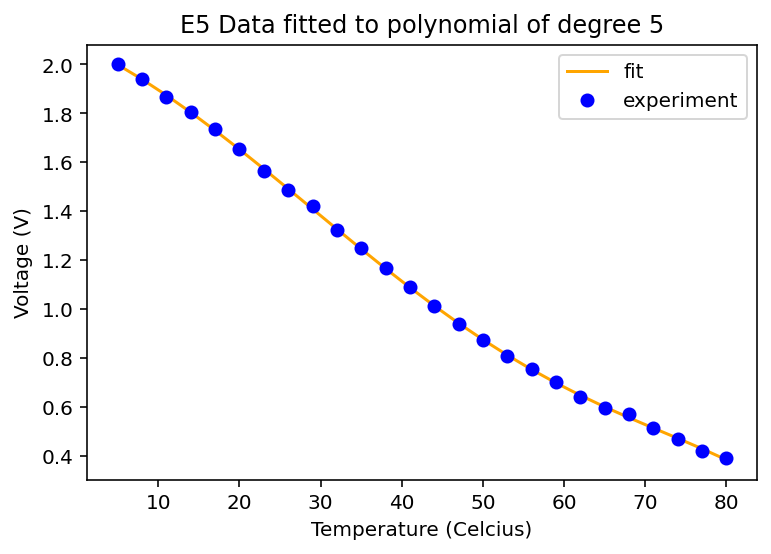

In [18]:
#degree of fitted polynomial
degree = 5

#coefficients of fitted polynomial
p = my_fit(temp,voltage,0.006,degree)[0]

#fitted polynomial line
line = np.poly1d(p)

#Generating a corresponding array of y-values
y =line(temp)

#plotting the fit line, '-' means that line drawn is going to be solid, the colour of the line is orange
plt.plot(temp, y, '-', color="orange", label='fit')

#plotting the experimental data, 'o' means that the points are plotted to be circles, the colour of the data points is blue
plt.plot(temp, voltage,'o', color="blue", label='experiment')

#Title of my graph
plt.title('E5 Data fitted to polynomial of degree 5')

#x-axis label of my graph
plt.xlabel('Temperature (Celcius)')

#y-axis label of my graph
plt.ylabel('Voltage (V)')

#legend of my graph
plt.legend()



# **Task 7**: Fitting the residuals to a Gaussian

It would be interesting to have a closer look at the residuals. In theory, they should follow a Gaussian (normal) distribution. Do they?

<div class="alert alert-success">
    
Fit the residuals to a Gaussian using scipy.stats (following the same process as we did in session 2, you can use your session 2 code as a starting point if you want), and plot them as a histogram together with the fitted Gaussian.
<br><br>
Do you think that these residuals match the expected distribution?
What relation do you notice between the standard deviation of the residuals and the experimental error on the voltage reading estimated by the student who did this experiment? Explain in a text cell.</div>

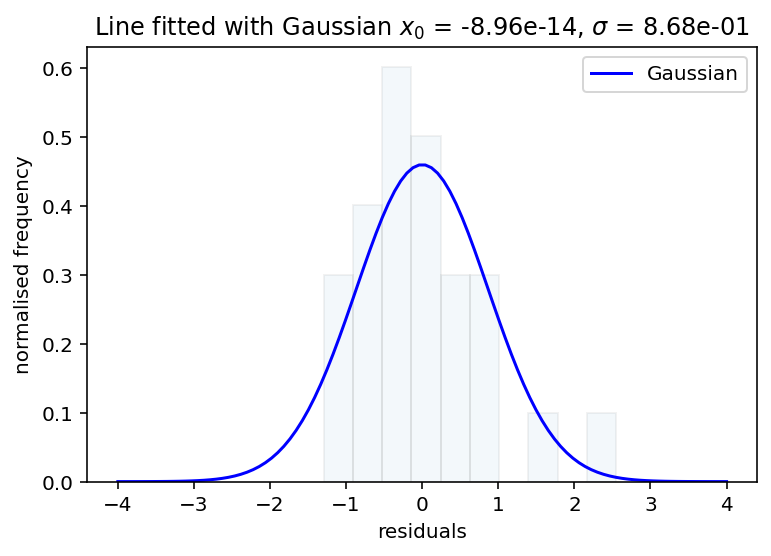

In [19]:
#importing the statistical functions (scipy.stats) module
import scipy.stats as stats 

#Using np.linspace to create an array of x_data of 100 ordered, equally spaced  x-values for the fitted line starting at -4 and finishing at 4
x_data = np.linspace(-4,4,100)

#getting the array of residual values from the function 'my_fit' (p.s the degree = 5)
residuals = my_fit(temp,voltage,0.006,degree)[2]


#finding the actual mean (x0) and standard deviation (sigma) of 'residuals' dataset
x0, sigma = stats.norm.fit(residuals)


#generates the probability density function ("pdf"), i.e. a Gaussian as a set of y-values
gaussian = stats.norm.pdf(x_data,x0,sigma)


#plotting the histogram of residual values
plt.hist(residuals, density=True,alpha=0.05,edgecolor='k')

#plotting the gaussian
plt.plot(x_data,gaussian,'b-', label='Gaussian')

#legend of my graph
plt.legend()

#x-axis label 
plt.xlabel('residuals')

#y-axis label
plt.ylabel('normalised frequency')

#title of graph
title_label=(f'Line fitted with Gaussian $x_0$ = {x0:8.2e}, $\sigma$ = {sigma:8.2e}')
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places

#title of graph
plt.title(title_label) ;


# What's coming next

In this session we've seen how to fit data in a general case when we don't already know from a theoretical model what function we want to fit to. In the next session, we'll be looking at how to to use Python to fit a line when we know what function we want to fit the data to.

General quality of plots

General quality of code comments and docstrings

General quality of text cells